In [2]:
import torch
import numpy as np
import schrodinger_system
from scipy import integrate, sparse
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from matplotlib import cm


In [3]:
a = torch.rand(2, 3, 4)
a

tensor([[[0.9141, 0.8547, 0.0866, 0.7061],
         [0.6658, 0.8130, 0.3299, 0.1475],
         [0.0843, 0.3802, 0.4258, 0.9751]],

        [[0.4710, 0.4011, 0.5899, 0.6744],
         [0.6375, 0.9604, 0.1110, 0.8081],
         [0.6021, 0.9872, 0.0507, 0.5730]]])

In [14]:
X, y = schrodinger_system.gen_schro_dataset_x0_cart_real()
X

c:\Users\zzh\Desktop\Oxford\dissertation\deeponet\src\schrodinger_system.py:249: ComplexWarning: Casting complex values to real discards the imaginary part
  initial_data[i] = psi0**2
c:\Users\zzh\Desktop\Oxford\dissertation\deeponet\src\schrodinger_system.py:250: ComplexWarning: Casting complex values to real discards the imaginary part
  y_data[i] = np.array(sol.y**2, dtype=np.float32).flatten()


(array([[ 4.1796597e-12,  8.1547414e-06,  6.0888898e-02, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -6.0063354e-03, -1.0838128e-06, -6.1007709e-13],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -9.8410653e-22, -1.2984543e-32, -0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -1.2711719e-01, -9.5818430e-04, -2.2530957e-08],
        [ 6.9019308e-08,  4.1719899e-03,  9.6510506e-01, ...,
         -0.0000000e+00, -0.0000000e+00,  0.0000000e+00]], dtype=float32),
 array([[0.  , 0.  ],
        [0.05, 0.  ],
        [0.1 , 0.  ],
        [0.15, 0.  ],
        [0.2 , 0.  ],
        [0.25, 0.  ],
        [0.3 , 0.  ],
        [0.35, 0.  ],
        [0.4 , 0.  ],
        [0.45, 0.  ],
        [0.5 , 0.  ],
        

In [15]:
print(np.shape(X[0]))
print(np.shape(X[1]))
print(np.shape(y))

(500, 20)
(400, 2)
(500, 400)


In [2]:
X, y = schrodinger_system.gen_schro_dataset_x0()
print(np.shape(X[0]))
print(np.shape(X[1]))
print(np.shape(y))

(500, 200)
(500,)
(500, 200)


In [3]:
y[0][0].dtype

dtype('complex64')

In [20]:
x_2d = torch.zeros([10, 5, 2], dtype = torch.float64)
for i in range(10):
    for j in range(5):
        x_2d[i, j, 0] = x_complex[i, j].real
        x_2d[i, j, 1] = x_complex[i, j].imag

x_2d

tensor([[[0.3160, 0.6651],
         [0.9332, 0.1243],
         [0.2775, 0.6450],
         [0.8916, 0.6433],
         [0.7196, 0.6314]],

        [[0.1176, 0.8217],
         [0.1399, 0.4219],
         [0.9782, 0.4695],
         [0.8324, 0.8161],
         [0.9104, 0.3651]],

        [[0.1019, 0.9845],
         [0.0720, 0.1163],
         [0.2631, 0.2035],
         [0.2378, 0.8934],
         [0.3936, 0.2070]],

        [[0.1532, 0.1404],
         [0.7193, 0.7102],
         [0.5935, 0.5822],
         [0.2654, 0.3294],
         [0.4876, 0.4549]],

        [[0.2689, 0.2507],
         [0.4439, 0.5997],
         [0.6187, 0.9967],
         [0.3757, 0.7671],
         [0.0970, 0.5401]],

        [[0.8683, 0.6575],
         [0.1821, 0.4016],
         [0.6073, 0.2656],
         [0.5068, 0.7912],
         [0.3431, 0.1371]],

        [[0.8130, 0.7400],
         [0.2493, 0.2896],
         [0.6575, 0.3904],
         [0.6960, 0.4230],
         [0.4258, 0.8329]],

        [[0.4678, 0.1669],
         [0.67

# Schrodinger Test

In [11]:
def gen_schro_dataset_x0_cart_complex(num=500, sensors=20, sigma=0.3, t0=0,tf=1):
    dx = 10 / sensors
    dt = (tf-t0) / sensors
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass
    hbar = 1
    
    x0_min = 0.5
    x0_max = 9.5
    
    x0 = 3
    
    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = 0.5 * k * (x - x_Vmin)**2
    
    
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    x0s = np.random.uniform(x0_min, x0_max, size=num)
    ts = np.arange(t0, tf, dt)
    # Generating Datasets
    initial_data = np.zeros((num, sensors, 2),dtype=np.float32)
    y_data = np.zeros((num, sensors*sensors, 2),dtype=np.float32)
    locs = np.zeros((sensors**2,2),dtype=np.float32)
    locs[:, 0] = np.tile(ts, (sensors, 1)).flatten()
    locs[:, 1] = np.tile(x[:, np.newaxis], (1, sensors)).flatten()
    
    for i in range(num):
        x0 = x0s[i]
        A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

        # Initial Wavefunction
        psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
        
        sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = ts, method="RK23")
        psi0_real = [psi.real for psi in psi0]
        psi0_imag = [psi.imag for psi in psi0]
        
        for j in range(sensors):
            initial_data[i, j, 0] = np.real(psi0[j])
            initial_data[i, j, 1] = np.imag(psi0[j])

        
        y_flat = np.array(sol.y).flatten()
        for j in range(sensors*sensors):
            y_data[i, j, 0] = np.real(y_flat[j])
            y_data[i, j, 1] = np.imag(y_flat[j])
    
    
    return (initial_data, locs), y_data

In [3]:
data = gen_schro_dataset_x0_cart_complex(num=500, sensors=20, sigma=0.3, t0=0,tf=1)


NameError: name 'gen_schro_dataset_x0_cart_complex' is not defined

In [58]:
X, y = data
np.shape(y)

(500, 400, 2)

In [2]:
import torch

In [5]:
x_func = torch.randn(5, 2, 20)
x_loc = torch.randn(6, 20)


In [9]:
torch.matmul(x_func, x_loc.T).shape

torch.Size([5, 2, 6])

In [23]:
L = 5
N = 10

x = np.linspace(0, L, N)
y = np.exp(1j*(2 * np.pi)*x / L) / np.sqrt(L) 

np.sum(np.abs(y)**2) * (L / N)

np.float64(0.9999999999999998)

# Schrodinger Complex

In [88]:
def gen_schro_dataset_fixed(num=200, sensors = 500, x0=3.0, sigma=0.3, t0=0,tf=1):
    dx = 10 / sensors
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass

    # For initial conditions
    A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

    # Initial Wavefunction
    psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
    

    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = 0.5 * k * (x - x_Vmin)**2
    #V = 0 * x
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    
    # RHS of Schrodinger Equation
    hbar = 1
    # hbar = 1.0545718176461565e-34
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    dt = (tf - t0) / num
    t_eval = np.arange(t0, tf, dt)  # recorded time shots
    
    # Solve the Initial Value Problem
    sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
    
    y_data = np.array(sol.y, dtype=np.complex128)
    y_data = np.transpose(y_data)
    
    initial_data = np.tile(y_data[0], (num, 1))
    
    return (initial_data, t_eval), y_data

In [175]:
def gen_schro_fourier_fixed(num= 200, potential = "zero", sensors = 500, x_max = 10, x0=3.0, sigma=0.3, t0=0,tf=1):
    """ Generate the Fourier coefficients of entire dynamics of one Schrodinger equations with fixed initial conditions

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        x0 (float, optional): cetre of initial conditions. Defaults to 3.0.
        sigma (float, optional): Defaults to 0.3.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): repeated copies of fourier coefficients of identical initial conditions [[u^hat(x, 0)], [u^hat(x, 0)], ... [u^hat(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u^hat(x, t) with [[u^hat(x, t_1)], ..., [u^hat(x, t_num)]]
    """
    dx = x_max / sensors
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass

    # For initial conditions
    A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

    # Initial Wavefunction
    psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
    

    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = x * 0
    
    if potential == "quadratic":
        V = 0.5 * k * (x - x_Vmin)**2

    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    
    # RHS of Schrodinger Equation
    hbar = 1
    # hbar = 1.0545718176461565e-34
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    dt = (tf - t0) / num
    t_eval = np.arange(t0, tf, dt)  # recorded time shots
    
    # Solve the Initial Value Problem
    sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
    
    y_data = np.array(sol.y, dtype=np.complex64)
    y_data = np.transpose(y_data)
    
    initial_data = np.tile(y_data[0], (num, 1))
    
    X_hat = fft(initial_data)
    y_hat = fft(y_data)
    
    return (X_hat, t_eval), y_hat

In [102]:
def gen_schro_dataset_rand(num = 200, sensors= 500, t0=0,tf=1):
    
    # Specify constants
    dx = 10 / sensors
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass
    hbar = 1
    
    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 2.0
    
    x0_min = 1.0
    x0_max = 9.0
    
    
    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = 0.5 * k * (x - x_Vmin)**2
    #V = x*0
    
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    # Define psi_t
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    ts = np.random.uniform(t0, tf, num)
    
    # Generating Datasets
    initial_data = np.zeros((num, sensors),dtype=np.complex64)
    y_data = np.zeros((num, sensors),dtype=np.complex64)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

        # Initial Wavefunction
        psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
        
    
        t_eval = np.array([ts[i]])
        sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
        initial_data[i] = psi0
        y_data[i] = np.transpose(sol.y)[0]
    
    
    return (initial_data, ts), y_data

In [105]:
def gen_schro_fourier_rand(num = 200, sensors= 500, t0=0,tf=1):
    
    # Specify constants
    dx = 10 / sensors
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass
    hbar = 1
    
    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 2.0
    
    x0_min = 1.0
    x0_max = 9.0
    
    
    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = 0.5 * k * (x - x_Vmin)**2
    #V = x*0
    
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    # Define psi_t
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    ts = np.random.uniform(t0, tf, num)
    
    # Generating Datasets
    initial_data = np.zeros((num, sensors),dtype=np.complex64)
    y_data = np.zeros((num, sensors),dtype=np.complex64)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

        # Initial Wavefunction
        psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
        
    
        t_eval = np.array([ts[i]])
        sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
        initial_data[i] = psi0
        y_data[i] = np.transpose(sol.y)[0]
    
    
    X_hat = fft(initial_data)
    y_hat = fft(y_data)
    return (X_hat, ts), y_hat

In [ ]:
def gen_schro_fourier_fixed_multi(nu = 200, nx = 100, nt= 50, t0=0,tf=1):
    
    # Specify constants
    dx = 10 / nx
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass
    hbar = 1
    
    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 2.0
    
    x0_min = 1.0
    x0_max = 9.0
    
    
    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = 0.5 * k * (x - x_Vmin)**2
    #V = x*0
    
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    # Define psi_t
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=nu)
    x0s = np.random.uniform(x0_min, x0_max, size= nu)
    ts = np.linspace(t0, tf, nt)
    
    # Generating Datasets
    initial_data = np.zeros((nu, nx),dtype=np.complex64)
    y_data = np.zeros((nu, nx, nt),dtype=np.complex64)
    y_hat = np.zeros((nu, nx, nt),dtype=np.complex64)
    
    for i in range(nu):
        sigma = sigmas[i]
        x0 = x0s[i]
        A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

        # Initial Wavefunction
        psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
        
    
        t_eval = ts
        sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
        initial_data[i] = psi0
        y_data[i] = sol.y
        
        y_hat[i] = fft(y_data[i])
    
    
    X_hat = fft(initial_data)
    #y_hat = fft(y_data)
    return (X_hat, ts), y_hat



In [145]:
def hey():
    print("hey")

a = hey
print(f"function{a.__name__}")

functionhey


In [119]:
X, y = gen_schro_fourier_rand_multi()
dx = 10 / 500
x = np.arange(0, 10, dx)
x_grid, t_grid  = np.meshgrid(x, X[1])

# Fourier Transform Here

In [10]:
from scipy.fft import fft, ifft
import scipy

In [11]:
X, y = gen_schro_dataset_fixed()
dx = 10 / 500
x = np.arange(0, 10, dx)
x_grid, t_grid  = np.meshgrid(x, X[1])

ax = plt.axes(projection="3d")
ax.plot_surface(x_grid, t_grid, np.abs(y)**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax.set_xlabel('x')
ax.set_ylabel('t')

NameError: name 'gen_schro_dataset_fixed' is not defined

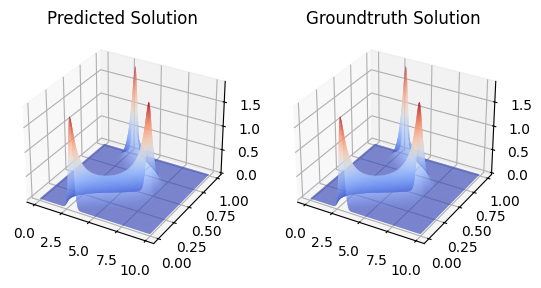

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
ax1.plot_surface(x_grid, t_grid, np.abs(y)**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax1.set_title("Predicted Solution")
ax2.plot_surface(x_grid, t_grid, np.abs(y)**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax2.set_title("Groundtruth Solution")
plt.show()

In [ ]:
y_hat = fft(y)
np.allclose(y, ifft(y_hat))

True

In [ ]:
def gen_schro_fourier_rand_multi(nu = 200, nx = 100, potential = "zero", nt= 50, t0=0,tf=1):
    
    # Specify constants
    dx = 10 / nx
    x     = np.arange(0, 10, dx)       # spatial grid points
    kx    = 0.1                        # wave number
    m     = 0.5                          # mass
    hbar = 1
    
    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 2.0
    
    x0_min = 1.0
    x0_max = 9.0
    
    
    # Potential V(x)
    x_Vmin = 5         # center of V(x)
    T      = 1           # peroid of SHO 

    # For RHS
    omega = 2 * np.pi / T
    k = omega**2 * m
    V = x * 0
    
    if potential == "quadratic":
        V = 0.5 * k * (x - x_Vmin)**2
    
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
    
    # Define psi_t
    def psi_t(t, psi):
        return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)
    
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=nu)
    x0s = np.random.uniform(x0_min, x0_max, size= nu)
    ts = np.linspace(t0, tf, nt)
    
    if nu == 1:
        print(f"x0s = {x0s}")
        print(f"sigmas = {sigmas}")
    # Generating Datasets
    initial_data = np.zeros((nu, nx),dtype=np.complex64)
    y_data = np.zeros((nu, nx, nt),dtype=np.complex64)
    y_hat = np.zeros((nu, nx, nt),dtype=np.complex64)
    
    for i in range(nu):
        sigma = sigmas[i]
        x0 = x0s[i]
        A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

        # Initial Wavefunction
        psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
        
    
        t_eval = ts
        sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
        initial_data[i] = psi0
        y_data[i] = sol.y
        
        y_hat[i] = np.transpose(fft(np.transpose(y_data[i])))
    
    
    X_hat = fft(initial_data)
    #y_hat = fft(y_data)
    return (X_hat, ts), y_hat

In [ ]:
X, y = gen_schro_fourier_rand_multi(nu=1)
np.shape(X[0])

x0s = [6.97164735]
sigmas = [1.48820559]


(1, 100)

In [ ]:
np.shape(y)

(1, 100, 50)

x0s = [7.92258858]
sigmas = [1.88433096]


Text(0.5, 0.5, 't')

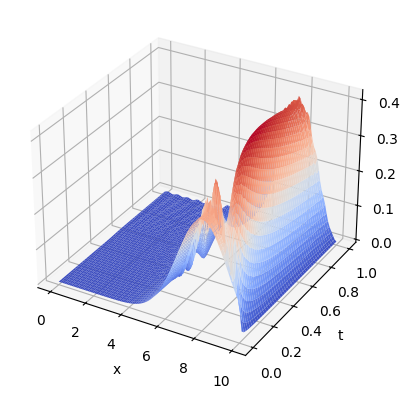

In [ ]:
X, y = gen_schro_fourier_rand_multi(nu=1)
dx = 10 / 200
x = np.linspace(0, 10, 100)
x_grid, t_grid  = np.meshgrid(x, X[1])

y_sol = ifft(np.transpose(y[0]))
ax = plt.axes(projection="3d")
#ax.plot_surface(x_grid, t_grid, np.abs(np.transpose(y[0]))**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax.plot_surface(x_grid, t_grid, np.abs(y_sol)**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax.set_xlabel('x')
ax.set_ylabel('t')

Text(0.5, 0.5, 't')

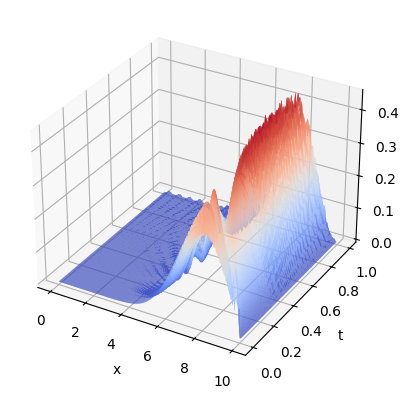

In [ ]:
X, y = gen_schro_fourier_fixed(x0= 7.92258858, sigma = 1.88433096)
dx = 10 / 500
x = np.arange(0, 10, dx)
x_grid, t_grid  = np.meshgrid(x, X[1])

ax = plt.axes(projection="3d")

ax.plot_surface(x_grid, t_grid, np.abs(ifft(y))**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax.set_xlabel('x')
ax.set_ylabel('t')

Text(0.5, 0.5, 't')

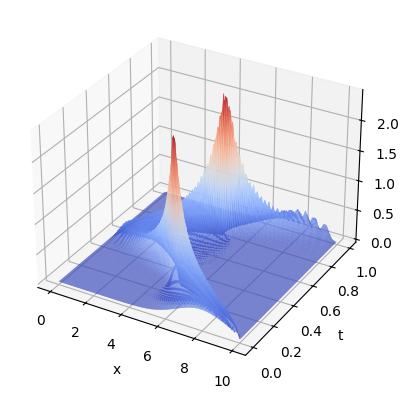

In [ ]:
X, y = gen_schro_dataset_fixed(x0= 7.92258858, sigma = 1.88433096)
dx = 10 / 500
x = np.arange(0, 10, dx)
x_grid, t_grid  = np.meshgrid(x, X[1])

ax = plt.axes(projection="3d")

ax.plot_surface(x_grid, t_grid, np.abs(y)**2, rstride=1, cstride=1,cmap = cm.coolwarm, edgecolor="none")
ax.set_xlabel('x')
ax.set_ylabel('t')

In [ ]:
for yt in y:
    print(np.sum(np.abs(yt)**2))

20.0
19.998270358896885
19.99663492663298
19.995222155766072
19.99375800089597
19.99258835105433
19.99128285961433
19.990212362536383
19.98905072982099
19.987993430319218
19.98702117990697
19.985955400958545
19.984988389663286
19.98409000722202
19.98315954527155
19.982205427728115
19.981327334237346
19.980490995759713
19.97966115029335
19.978810514092434
19.977953260034877
19.97713428428088
19.976344261846517
19.97557381970185
19.974815820671655
19.97406563241207
19.973320878793935
19.972580946334578
19.971846416140163
19.971118521989354
19.97039868062699
19.96968800915231
19.968986361915388
19.9682877205401
19.96757865705195
19.9668441718038
19.966077790439567
19.96528662460067
19.96448362887815
19.96366133896424
19.96275193079734
19.961811286698463
19.96093442521827
19.96003986292032
19.959047271787774
19.958141705877857
19.957258111980316
19.956267519127643
19.955349591905133
19.954479358627385
19.953513599602257
19.952587500808814
19.95172954324681
19.950808343619332
19.94986795723

In [ ]:
for i,yt in enumerate(y):
    print(np.sum(np.abs(yt)**2)* dx)

1.0
0.9999135179448443
0.999831746331649
0.9997611077883036
0.9996879000447985
0.9996294175527165
0.9995641429807165
0.9995106181268192
0.9994525364910495
0.999399671515961
0.9993510589953486
0.9992977700479273
0.9992494194831644
0.999204500361101
0.9991579772635776
0.9991102713864057
0.9990663667118673
0.9990245497879857
0.9989830575146675
0.9989405257046218
0.9988976630017439
0.998856714214044
0.9988172130923259
0.9987786909850925
0.9987407910335828
0.9987032816206036
0.9986660439396968
0.998629047316729
0.9985923208070082
0.9985559260994677
0.9985199340313495
0.9984844004576156
0.9984493180957694
0.998414386027005
0.9983789328525975
0.9983422085901901
0.9983038895219783
0.9982643312300334
0.9982241814439075
0.998183066948212
0.998137596539867
0.9980905643349232
0.9980467212609135
0.998001993146016
0.9979523635893888
0.9979070852938929
0.9978629055990158
0.9978133759563822
0.9977674795952567
0.9977239679313693
0.9976756799801129
0.9976293750404408
0.9975864771623405
0.997540417180966

In [ ]:
A = torch.rand(3, 5, dtype=torch.complex64)
Q, R = torch.linalg.qr(A)


In [ ]:
Q@torch.conj(Q).T

tensor([[ 1.0000e+00+5.7345e-09j,  2.9802e-08-2.9802e-08j,
         -2.6077e-08+5.9605e-08j],
        [ 2.9802e-08+2.9802e-08j,  1.0000e+00-2.7793e-09j,
          2.9802e-08-4.4703e-08j],
        [-2.6077e-08-5.9605e-08j,  2.9802e-08+4.4703e-08j,
          1.0000e+00-5.8565e-09j]])

In [ ]:
torch.allclose(Q@torch.conj(Q).T, torch.eye(3, dtype=torch.complex64), atol=1e-8)

False

In [ ]:
a = torch.rand(3, dtype=torch.complex64)
torch.linalg.vector_norm(a)

tensor(1.4214)

In [ ]:
torch.sqrt(a@torch.conj(a))

tensor(1.4214+0.j)

In [ ]:
a = torch.rand(2, 3)
norm_a = torch.linalg.vector_norm(a, dim=0, keepdim=True)
norm_a

tensor([[0.8741, 0.6759, 1.3498]])

In [ ]:
a

tensor([[0.1476, 0.2392, 0.9656],
        [0.8616, 0.6322, 0.9432]])

In [ ]:
b = a / norm_a
b

tensor([[0.1689, 0.3539, 0.7153],
        [0.9856, 0.9353, 0.6988]])

In [ ]:
torch.dot(b[:, 0], b[:, 0])

tensor(1.0000)

In [ ]:
A = torch.rand(5, 4, 3)
torch.linalg.vector_norm(A, dim=1, keepdim=True).shape

torch.Size([5, 1, 3])

In [ ]:
B = A / torch.linalg.vector_norm(A, dim=1, keepdim=True)
torch.norm(B[2][:, 1])

tensor(1.0000)

In [ ]:
X = torch.rand(10, 8, dtype=torch.complex64)

E = torch.tensor([torch.sum(torch.abs(Xi)**2) for Xi in X])
E

tensor([4.7175, 4.9170, 6.8424, 3.0426, 5.3804, 5.3708, 4.6897, 5.5697, 5.9754,
        3.9899])

In [ ]:
torch.sum(torch.abs(X[0])**2)

tensor(4.7175)

In [ ]:
n = 3
p = 6
A = torch.rand(2, n, p)
alpha = torch.rand(p)
(A@alpha).T

tensor([[0.5089, 0.4389],
        [0.5291, 0.4418],
        [0.6985, 0.4655]])

In [ ]:
A_T = torch.transpose(A, 0, 1)
(A_T@alpha)

tensor([[0.5089, 0.4389],
        [0.5291, 0.4418],
        [0.6985, 0.4655]])

# Wave Equation


CFL =  0.0792


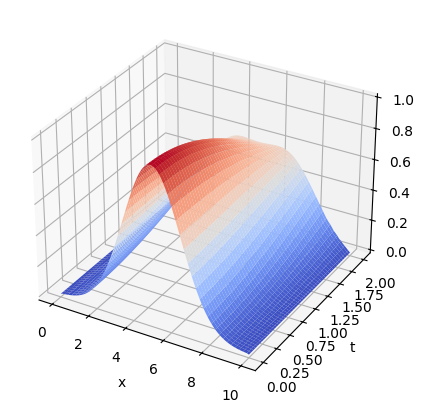

In [4]:

import matplotlib.pyplot as plt

# Define spatial and temporal parameters
L = 10.0  # Length of the domain
Nx = 100  # Number of spatial points
dx = L / (Nx - 1)  # Spatial step
x = np.linspace(0, L, Nx)  # Spatial grid

T = 2.0  # Total time
Nt = 200  # Number of time steps
dt = T / Nt  # Time step
t = np.linspace(0, T, Nt)
c = 0.8 # Wave speed

# Stability condition: CFL number
CFL = c * dt / dx
print("CFL = ", CFL)
if CFL > 1:
    print("Warning: CFL condition not satisfied, decrease dt or increase dx.")

# Initialize solution vectors
sigma = 1.5
u = np.exp(-((x - L/2) ** 2 / (2.0 * sigma**2)))  # Initial condition (Gaussian pulse)
v = np.zeros_like(u)  # Initial velocity is zero

# Time evolution using finite differences
u_new = np.copy(u)
v_new = np.copy(v)

# Store results for visualization
us = np.zeros((Nt, Nx))
vs = np.zeros((Nt, Nx))

for n in range(Nt):
    # Compute second spatial derivative using central difference
    u_xx = np.zeros_like(u)
    u_xx[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    
    # Update equations
    v_new[1:-1] = v[1:-1] + dt * c**2 * u_xx[1:-1]
    u_new[1:-1] = u[1:-1] + dt * v[1:-1]

    # Enforce boundary conditions (e.g., Dirichlet u = 0)
    u_new[0] = u_new[-1] = 0
    v_new[0] = v_new[-1] = 0

    # Update values
    u, u_new = u_new, u  # Swap references
    v, v_new = v_new, v

    # Store solution at some time steps
    us[n] = np.copy(u)
    vs[n] = np.copy(v)

# Plot the wave propagation
x_grid, t_grid = np.meshgrid(x, t)


plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, us, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("t")
plt.show()


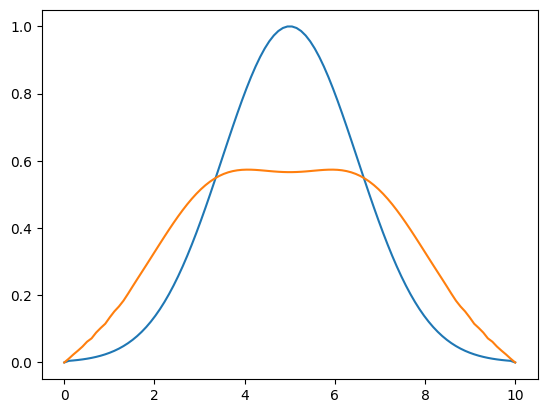

In [350]:
plt.plot(x, us[0])
plt.plot(x, us[-1])

In [235]:
np.shape(us)

(200, 100)

In [239]:
t[-1]

np.float64(2.0)

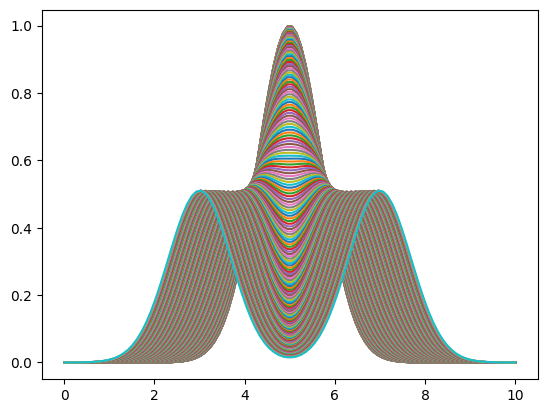

In [237]:
for u in us:
    plt.plot(x, u)
plt.show()

In [9]:
def solve_wave_single(u0, v0, c, t_ind, Nt, Nx = 100, L = 10.0, T = 1.0):
   
   # Number of spatial points
    dx = L / (Nx - 1)  # Spatial step
    x = np.linspace(0, L, Nx)  # Spatial grid

    # Number of time steps
    dt = T / Nt  # Time step
    t = np.linspace(0, T, Nt)  

    # Stability condition: CFL number
    CFL = c * dt / dx
    if CFL > 1:
        print("Warning: CFL condition not satisfied, decrease dt or increase dx.")

    # Initialize solution vectors
    #u = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
    #v = np.zeros_like(u)  # Initial velocity is zero
    u = u0
    v = v0

    # Time evolution using finite differences
    u_new = np.copy(u)
    v_new = np.copy(v)

    # Store results for visualization
    us = np.zeros((Nt, Nx))
    vs = np.zeros((Nt, Nx))

    for n in range(Nt):
        # Compute second spatial derivative using central difference
        u_xx = np.zeros_like(u)
        u_xx[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
        
        # Update equations
        v_new[1:-1] = v[1:-1] + dt * c**2 * u_xx[1:-1]
        u_new[1:-1] = u[1:-1] + dt * v[1:-1]

        # Enforce boundary conditions (e.g., Dirichlet u = 0)
        u_new[0] = u_new[-1] = 0
        v_new[0] = v_new[-1] = 0

        # Update values
        u, u_new = u_new, u  # Swap references
        v, v_new = v_new, v

        # Store solution at some time steps
        us[n] = np.copy(u)
        vs[n] = np.copy(v)

    
    return np.stack((us[t_ind], vs[t_ind]), axis = 1)

In [10]:
def solve_wave_whole(u0, v0,c, L = 10.0, T = 1.0, Nx = 100, Nt = 500):
   
   # Number of spatial points
    dx = L / (Nx - 1)  # Spatial step
    x = np.linspace(0, L, Nx)  # Spatial grid

    # Number of time steps
    dt = T / Nt  # Time step
    t = np.linspace(0, T, Nt)
    

    # Stability condition: CFL number
    CFL = c * dt / dx
    if CFL > 1:
        print("Warning: CFL condition not satisfied, decrease dt or increase dx.")

    # Initialize solution vectors
    u = u0# Initial condition (Gaussian pulse)
    v = v0 # Initial velocity is zero

    # Time evolution using finite differences
    u_new = np.copy(u)
    v_new = np.copy(v)

    # Store results for visualization
    us = np.zeros((Nt, Nx))
    vs = np.zeros((Nt, Nx))

    for n in range(Nt):
        # Compute second spatial derivative using central difference
        u_xx = np.zeros_like(u)
        u_xx[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
        
        # Update equations
        v_new[1:-1] = v[1:-1] + dt * c**2 * u_xx[1:-1]
        u_new[1:-1] = u[1:-1] + dt * v[1:-1]

        # Enforce boundary conditions (e.g., Dirichlet u = 0)
        u_new[0] = u_new[-1] = 0
        v_new[0] = v_new[-1] = 0

        # Update values
        u, u_new = u_new, u  # Swap references
        v, v_new = v_new, v

        # Store solution at some time steps
        us[n] = np.copy(u)
        vs[n] = np.copy(v)

    
    result = np.stack((us, vs), axis=2)
    return result

   

In [13]:
def gen_wave_dataset_rand_fixed_speed(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.arange(0, x_max, dx)       # spatial grid points
    hbar = 1

    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 1.2
    
    x0_min = 2.0
    x0_max = 8.0
    
    # Wave speed
    c = 1.0
    
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    t_inds = np.random.choice(np.arange(Nt), size = num)

    t_points = t[t_inds]
    
    # Generating Datasets
    initial_data = np.zeros((num, Nx*2),dtype=np.complex64)
    y_data = np.zeros((num, Nx*2),dtype=np.complex64)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        t_ind = t_inds[i]
        u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
        v0 = np.zeros_like(u0)  # Initial velocity is zero
        initial_data[i][0: Nx] = u0
        initial_data[i][Nx: ] = v0
        # Initial Wavefunction
        sol = solve_wave_single(u0=u0, v0=v0, t_ind = t_ind, Nt=Nt, c= c, Nx = Nx, L=x_max, T = tf)

        y_data[i][0: Nx] = sol[:, 0]
        y_data[i][Nx: ] = sol[:, 1]
    
    
    return (initial_data, t_points), y_data

In [14]:
X, y = gen_wave_dataset_rand_fixed_speed()

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


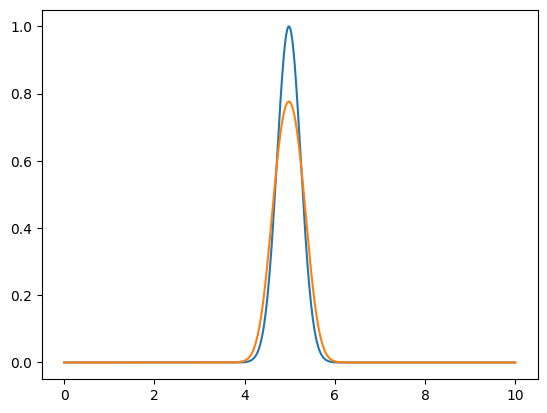

In [16]:
x = np.linspace(0, 10, 500)
plt.plot(x, X[0][0][0: 500])
plt.plot(x, y[0][0: 500])


In [299]:
X, y = gen_wave_dataset_rand()
print(np.shape(X[0]))
print(np.shape(X[1]))
print(np.shape(y))

(200, 500, 2)
(200,)
(200, 500, 2)


In [17]:
def gen_wave_fourier_rand_fixed_speed(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.arange(0, x_max, dx)       # spatial grid points
    hbar = 1

    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 1.2
    
    x0_min = 2.0
    x0_max = 8.0
    
    # Wave speed
    c = 1.0
    
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    t_inds = np.random.choice(np.arange(Nt), size = num)

    t_points = t[t_inds]
    
    # Generating Datasets
    initial_data = np.zeros((num, Nx*2),dtype=np.complex64)
    y_data = np.zeros((num, Nx*2),dtype=np.complex64)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        t_ind = t_inds[i]
        u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
        v0 = np.zeros_like(u0)  # Initial velocity is zero
        initial_data[i][0: Nx] = fft(u0)
        initial_data[i][Nx: ] = fft(v0)
        # Initial Wavefunction
        sol = solve_wave_single(u0=u0, v0=v0, t_ind = t_ind, Nt=Nt, c= c, Nx = Nx, L=x_max, T = tf)

        y_data[i][0 : Nx] = fft(sol[:, 0])
        y_data[i][Nx : ] = fft(sol[:, 1])
    
    
    return (initial_data, t_points), y_data

In [ ]:
def gen_wave_dataset_rand_fixed_speed(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.arange(0, x_max, dx)       # spatial grid points
    hbar = 1

    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 1.2
    
    x0_min = 2.0
    x0_max = 8.0
    
    # Wave speed
    c = 1.0
    
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    t_inds = np.random.choice(np.arange(Nt), size = num)

    t_points = t[t_inds]
    
    # Generating Datasets
    initial_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    y_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        t_ind = t_inds[i]
        u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
        v0 = np.zeros_like(u0)  # Initial velocity is zero
        initial_data[i] = np.stack((u0, v0), axis=1)
        # Initial Wavefunction
        sol = solve_wave_single(u0=u0, v0=v0, t_ind = t_ind, Nt=Nt, c= c, Nx = Nx, L=x_max, T = tf)

        y_data[i] = sol
    
    
    return (initial_data, t_points), y_data

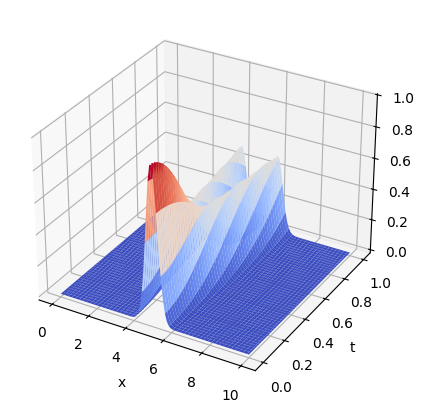

In [84]:
x     = np.linspace(0, 10, 100)  
x0 = 5
t = np.linspace(0, 1, 500)


x_grid, t_grid = np.meshgrid(x, t)
sigma = 0.3
u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
v0 = np.zeros_like(u0)  # Initial velocity is zero
sol = solve_wave_whole(u0, v0, L = 10.0, T = 1.0, Nx = 100, Nt = 500)
#plt.plot(x, ifft(fft(sol[:, 0])))

us = sol[:, :, 0]
plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, us, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [61]:
np.shape(sol)

(100, 2)

In [43]:
np.allclose(ifft(fft(sol)), sol)

True

In [37]:
sol[:, 0]

array([0.00000000e+00, 1.32614152e-30, 3.10019854e-29, 6.79820119e-28,
       1.39951210e-26, 2.70297911e-25, 4.89426003e-24, 8.30223485e-23,
       1.31838411e-21, 1.95836170e-20, 2.71895609e-19, 3.52543773e-18,
       4.26537436e-17, 4.81120838e-16, 5.05488410e-15, 4.94222219e-14,
       4.49228846e-13, 3.79239171e-12, 2.97036382e-11, 2.15621348e-10,
       1.44902995e-09, 9.00464059e-09, 5.16820412e-08, 2.73626179e-07,
       1.33462409e-06, 5.98906026e-06, 2.46914426e-05, 9.33865466e-05,
       3.23522182e-04, 1.02495405e-03, 2.96447241e-03, 7.81366076e-03,
       1.87327601e-02, 4.07674745e-02, 8.03632063e-02, 1.43163457e-01,
       2.29912094e-01, 3.31955505e-01, 4.29649719e-01, 4.96899042e-01,
       5.11671364e-01, 4.67247822e-01, 3.76675926e-01, 2.66678302e-01,
       1.64799169e-01, 8.82468205e-02, 4.05816070e-02, 1.58499012e-02,
       5.22044025e-03, 1.67603170e-03, 1.67603170e-03, 5.22044025e-03,
       1.58499012e-02, 4.05816070e-02, 8.82468205e-02, 1.64799169e-01,
      

A = np.random()

In [275]:
a = np.random.rand(10)
print(a)
b = np.random.rand(10)
np.stack((a, b), axis=1)

[0.62309468 0.48774988 0.64831188 0.66058666 0.16708302 0.8853826
 0.1243859  0.45043281 0.17648717 0.42519306]


array([[0.62309468, 0.30746335],
       [0.48774988, 0.01227319],
       [0.64831188, 0.29264877],
       [0.66058666, 0.95660129],
       [0.16708302, 0.5413267 ],
       [0.8853826 , 0.32506588],
       [0.1243859 , 0.18039909],
       [0.45043281, 0.08459021],
       [0.17648717, 0.77126481],
       [0.42519306, 0.97929144]])

In [62]:
X, y =  gen_wave_fourier_rand_fixed_speed(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1)

In [78]:
print(np.shape(X[0]))
print(np.shape(y))

(200, 500, 2)
(200, 500, 2)


In [59]:
nx = int(len(X[0][0]) / 2)


500

In [67]:
import scipy

## DFT Matrices


In [74]:
W = scipy.linalg.dft(nx)
W_inv = W.conj().T / nx
np.allclose(W@W_inv, np.eye(nx))

True

In [80]:
np.allclose(y[:, 0:500]@W_inv,ifft(y[:, 500:], axis=1))

False

In [90]:
W_large = np.kron(np.eye(2), W)
W_large_inv = np.kron(np.eye(2), W_inv)

In [89]:
np.allclose(W_inv@y[1, 0:500],ifft(y[1, 0:500]), atol=1e-7)

True

In [98]:
a = W_large_inv@y[1]
b = np.hstack((ifft(y[1][0:500]), ifft(y[1][500: ])))

In [102]:
np.allclose(a, b, atol=1e-6)

True

In [72]:
np.allclose(W_inv @ y[:, 0:500], a)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 200 is different from 500)

In [31]:
a = ifft(y[:, 0:500], axis=1)
b = ifft(y[:, 500:], axis=1)

In [32]:
np.hstack((a, b)).shape

(200, 1000)

(200, 1000)
(200, 1000)


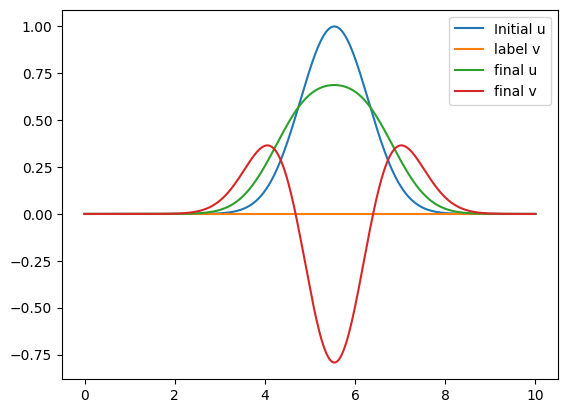

In [65]:
x = np.linspace(0, 10, 500)
i = 2
X_init = np.hstack((ifft(X[0][:, 0:500], axis=1), ifft(X[0][:, 500:], axis=1)))
print(X_init.shape)
y_sol = np.hstack((ifft(y[:, 0:500], axis=1), ifft(y[:, 500:], axis=1)))
print(y_sol.shape)
plt.plot(x, X_init[0][0: 500], label= "Initial u")
plt.plot(x, X_init[0][500: ], label= "label v")
plt.plot(x, y_sol[0][0: 500], label="final u")
plt.plot(x, y_sol[0][500: ], label="final v")
plt.legend()
plt.show()
#plt.plot(x, y[i][:, 0])

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


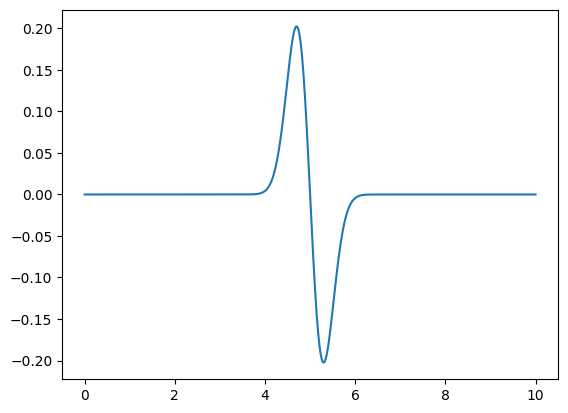

In [220]:
L = 10
N = 500
dx = L / N
k = (2 * np.pi / L) * scipy.fft.fftfreq(N, dx) # Get the frequency components
x = np.linspace(0, L, N)
# Construct differentiation matrix D
D = np.diag(1j * k) 
D_large = np.block([[D, np.zeros((N, N))], [np.zeros((N, N)), np.eye(N)]])

ux_hat = D_large@ y[0]

ux =  W_large_inv @ux_hat
plt.plot(x, ux[0: N])

In [221]:
a = np.stack((us[-1], vs[-1]), axis =1)
np.shape(a)

(100, 2)

Numerical derivative: [ 6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01  5.40012479e-15 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


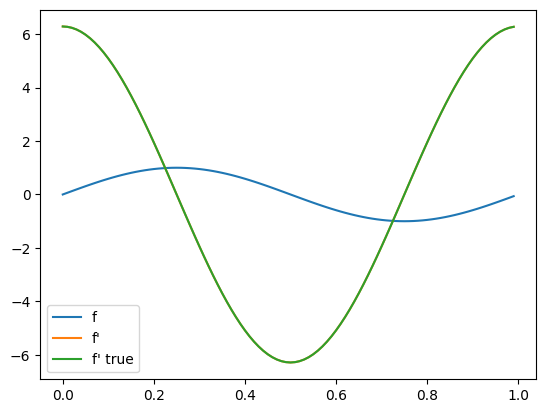

In [107]:
import numpy as np
from scipy.fft import fft, ifft, fftfreq

# Define grid
N = 100    # Number of points
L = 1.0    # Domain length
dx = L / N  # Sampling interval

x = np.linspace(0, L, N)
# Compute Fourier frequencies with proper scaling
k = (2 * np.pi / L) * fftfreq(N, dx)  # Correct physical frequencies

# Construct differentiation matrix
D = np.diag(1j * k)

# Example function f(x) = sin(2πx)
x = np.linspace(0, L, N, endpoint=False)
f = np.sin(2 * np.pi * x)
f_prime_true = 2*np.pi*np.cos(2*np.pi*x)

# Compute FFT
f_hat = fft(f)

# Compute Fourier transform of the derivative
f_prime_hat = D @ f_hat  # Correctly applies differentiation

# Transform back to real space
f_prime = np.real(ifft(f_prime_hat))

print("Numerical derivative:", f_prime)
plt.plot(x, ifft(f_hat), label="f")
plt.plot(x, np.real(ifft(f_prime_hat)), label="f'")
plt.plot(x, f_prime_true, label="f' true")
plt.legend()
plt.show()


In [46]:
def gen_wave_dataset_init_fixed_speed(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.linspace(0, x_max, Nx)       # spatial grid points

    
    Nt = num
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) 
    v0 = np.zeros_like(u0)  # Initial velocity is zero
    initial = np.hstack((u0, v0))
    initial_data = np.tile(initial, (num,1)).astype(np.complex64)
    y_data = np.zeros((num, Nx*2), dtype=np.complex64)
    
    # Generating Datasets
    #initial_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    #y_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    
    # Initial Wavefunction
    sol = solve_wave_whole(u0 = u0, v0 = v0 ,c = c, L = x_max, T = tf, Nx = Nx, Nt = Nt)
    for i in range(num):
        y_data[i][0: Nx] = sol[i, :, 0]
        y_data[i][Nx :] = sol[i, :, 1]
        
  
    
    
    return (initial_data, t), y_data

In [39]:
a = np.random.rand(4)
b = np.random.rand(4)
c = np.hstack((a, b))
c.shape

(8,)

In [110]:
a = np.random.rand(5, 2)
b = np.tile(a, (3, 1, 1),)
np.shape(b)

(3, 5, 2)

In [111]:
b

array([[[0.25572972, 0.02266267],
        [0.58723229, 0.55433771],
        [0.49818429, 0.184252  ],
        [0.58682259, 0.94905917],
        [0.42562181, 0.88027098]],

       [[0.25572972, 0.02266267],
        [0.58723229, 0.55433771],
        [0.49818429, 0.184252  ],
        [0.58682259, 0.94905917],
        [0.42562181, 0.88027098]],

       [[0.25572972, 0.02266267],
        [0.58723229, 0.55433771],
        [0.49818429, 0.184252  ],
        [0.58682259, 0.94905917],
        [0.42562181, 0.88027098]]])

In [47]:
X, y = gen_wave_dataset_init_fixed_speed(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1)

In [48]:
print(np.shape(X[0]))
print(np.shape(X[1]))
print(np.shape(y))

(200, 1000)
(200,)
(200, 1000)


In [ ]:
x = np.linspace(0, 10, 100)  
x0 = 5
t = np.linspace(0, 1, 500)


x_grid, t_grid = np.meshgrid(x, t)
sigma = 0.3
u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
v0 = np.zeros_like(u0)  # Initial velocity is zero
sol = solve_wave_whole(u0, v0, L = 10.0, T = 1.0, Nx = 100, Nt = 500)
#plt.plot(x, ifft(fft(sol[:, 0])))

us = sol[:, :, 0]
plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, us, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


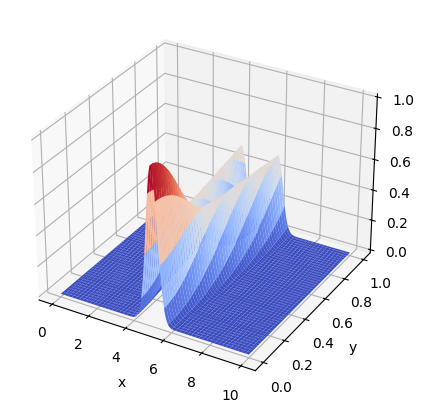

In [49]:
X, y = gen_wave_dataset_init_fixed_speed(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1)
x = np.linspace(0, 10, 500)  
x0 = 5
t = np.linspace(0, 1, 200)
x_grid, t_grid = np.meshgrid(x, t)

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, y[:, 0: 500], cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [55]:
def gen_wave_fourier_init_fixed_speed(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.linspace(0, x_max, Nx)       # spatial grid points

    
    Nt = num
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) 

    v0 = np.zeros_like(u0)  # Initial velocity is zero
    initial = np.hstack((fft(u0), fft(v0)))
    initial_data = np.tile(initial, (num,1)).astype(np.complex64)
    y_data = np.zeros((num, Nx*2), dtype=np.complex64)
    
    # Generating Datasets
    #initial_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    #y_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    
    # Initial Wavefunction
    sol = solve_wave_whole(u0 = u0, v0 = v0 ,c = c, L = x_max, T = tf, Nx = Nx, Nt = Nt)
    for i in range (num):
        y_data[i][0: Nx] = fft(sol[i, :, 0])
        y_data[i][Nx :] = fft(sol[i, :, 1])
    
    
    return (initial_data, t), y_data

(200, 500)


c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


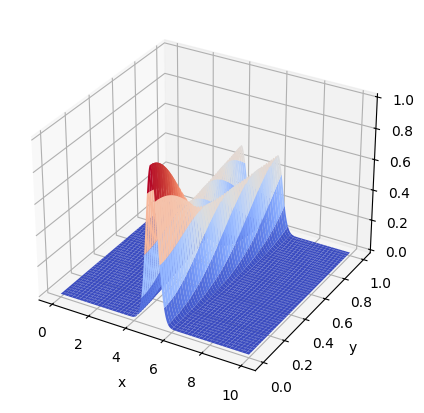

In [235]:
X, y = gen_wave_fourier_init_fixed_speed(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1)
print(y[:, 0:500].shape)
x = np.linspace(0, 10, 500)  
x0 = 5
t = np.linspace(0, 1, 200)
x_grid, t_grid = np.meshgrid(x, t)

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, ifft(y[:, 0: 500], axis=1), cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [238]:
ifft(y[0])

array([-1.90734872e-09+1.19209295e-10j,  3.75242233e-02-2.37661254e-04j,
        8.58306937e-09+1.78813936e-10j,  3.75242122e-02-4.75341105e-04j,
        1.71661387e-08-1.19209295e-10j,  3.75242233e-02-7.13058515e-04j,
        5.72204595e-09+0.00000000e+00j,  3.75242345e-02-9.50831454e-04j,
        1.14440919e-08+5.00679054e-09j,  3.75242122e-02-1.18867971e-03j,
        2.14576730e-08+9.53674362e-10j,  3.75242010e-02-1.42662914e-03j,
        2.86102297e-09+4.76837181e-10j,  3.75242159e-02-1.66469393e-03j,
       -5.24520916e-09+2.62260458e-09j,  3.75242308e-02-1.90288550e-03j,
       -4.76837181e-10-6.43730180e-09j,  3.75242233e-02-2.14123935e-03j,
        1.09672555e-08+1.66893011e-09j,  3.75242084e-02-2.37975712e-03j,
        1.00135811e-08-3.33786021e-09j,  3.75242345e-02-2.61849514e-03j,
        1.19209291e-08-4.29153468e-09j,  3.75242233e-02-2.85740965e-03j,
        5.24520916e-09-2.14576734e-09j,  3.75242345e-02-3.09657212e-03j,
        2.24113474e-08+1.90734872e-09j,  3.75242122

In [ ]:
y_sol = y@W_large_inv.conj().T
yx_true = np.array([np.gradient(yi[0:500], x) for yi in y_sol])
yx_true.shape
energy = np.zeros(len(yx_true))
c = 1.0
for i in range(len(yx_true)):
    ux_sum = c**2 * np.sum(yx_true[i][0: nx]**2)
    ut_sum = np.sum(y_sol[i][nx :] **2)
    energy[i] = (ux_sum + ut_sum)* dx
plt.plot(t, energy)
plt.ylim(-5, 5)


In [222]:

nx = 500
dx = 10 / nx
k = (2 * np.pi / 10) * fftfreq(nx, 1/ nx)
#k = np.fft.fftfreq(n) * nx
D = np.diag(1j * k)
D_large = np.block([[D, np.zeros((nx, nx))], [np.zeros((nx, nx)), np.eye(nx)]])

W = scipy.linalg.dft(nx)
W_inv = W.conj().T / nx

W_large = np.kron(np.eye(2), W)
W_large_inv = np.kron(np.eye(2), W_inv)
yx_sol = y@D_large.T@W_large_inv.T

In [213]:
yx_true.shape


(200, 500)

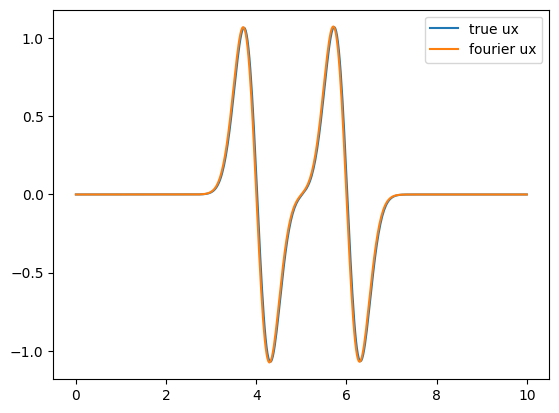

In [217]:
i = 199

plt.plot(x, yx_true[i], label="true ux")
plt.plot(x, yx_sol[i][0: nx], label="fourier ux")
plt.legend()
plt.show()

C:\Users\zzh\AppData\Local\Temp\ipykernel_25044\2835264400.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  energy[i] = (ux_sum + ut_sum)*dx


(-5.0, 5.0)

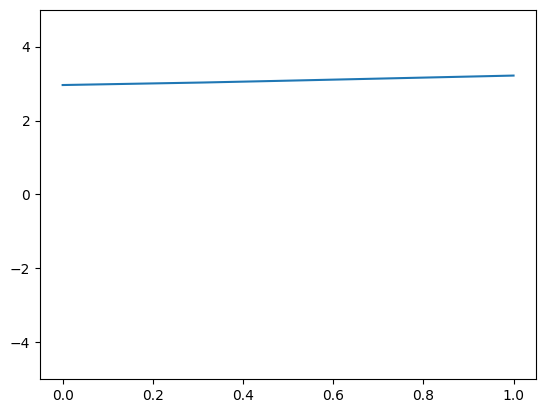

In [223]:
energy = np.zeros(len(y))
c = 1.0
for i in range(len(y)):
    ux_sum = c**2 * np.sum(yx_sol[i][0: nx]**2)
    ut_sum = np.sum(yx_sol[i][nx :] **2)
    energy[i] = (ux_sum + ut_sum)*dx
    
plt.plot(t, energy)
plt.ylim(-5, 5)

In [234]:
A = torch.rand((2, 2), dtype=torch.complex128)
print(A)
print(A.conj().T)

tensor([[0.1933+0.1005j, 0.4085+0.6290j],
        [0.2064+0.8949j, 0.0227+0.1616j]], dtype=torch.complex128)
tensor([[0.1933-0.1005j, 0.2064-0.8949j],
        [0.4085-0.6290j, 0.0227-0.1616j]], dtype=torch.complex128)


c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


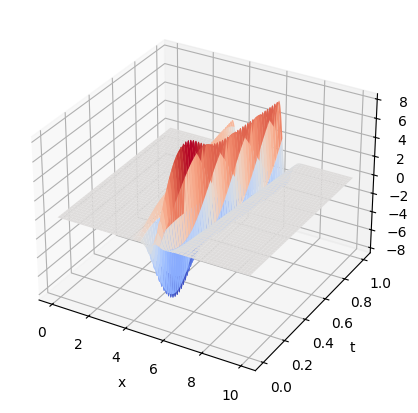

In [207]:

nx = 500
dx = 10 / nx
k = (2 * np.pi / 10) * fftfreq(nx, 1/ nx)
#k = np.fft.fftfreq(n) * nx
D = np.diag(1j * k)
D_large = np.kron(np.eye(2), D)

W = scipy.linalg.dft(nx)
W_inv = W.conj().T / nx

W_large = np.kron(np.eye(2), W)
W_large_inv = np.kron(np.eye(2), W_inv)
yx_sol = y@D_large.T@W_large_inv.T

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, yx_sol[:, nx:], cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [178]:
a = np.array([1, 2, 1])
2*np.sum(np.abs(a)**2)

np.int64(12)

In [193]:
energy = np.zeros(len(y))
c = 1.0
for i in range(len(y)):
    ux_sum = c**2 * np.sum(yx_sol[i][0: nx]**2)
    ut_sum = np.sum(yx_sol[i][nx :] **2)
    energy[i] = (ux_sum + ut_sum)*dx

C:\Users\zzh\AppData\Local\Temp\ipykernel_25044\3969522613.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  energy[i] = (ux_sum + ut_sum)*dx


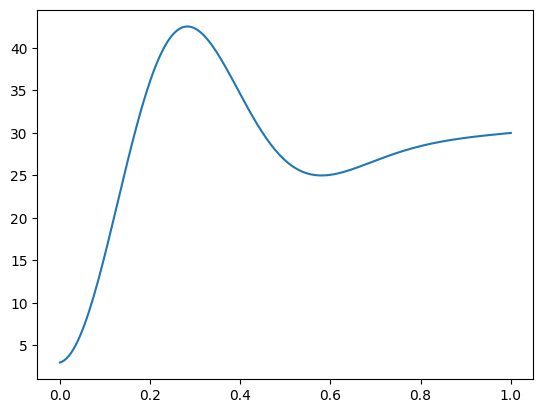

In [194]:
plt.plot(t, energy)

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


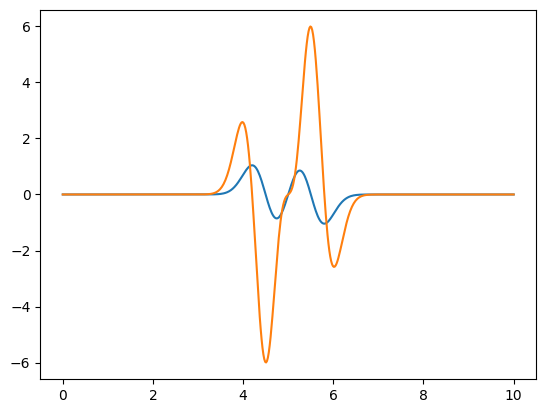

In [184]:
i = 100
plt.plot(x, yx_sol[i, 0:nx], label="ux")
plt.plot(x, yx_sol[i, nx: ], label="ut")

In [ ]:
W_large_inv@y[:, 0: 500]

In [128]:
np.allclose(W_large_inv@y[0], np.hstack((ifft(y[0][0: Nx]), ifft(y[0][Nx:]))), atol = 1e-7)
np.allclose(y@W_large_inv.T, np.hstack(((ifft(y[:, 0: Nx], axis=1), ifft(y[:, Nx:], axis=1)))), atol=1e-5)

True

[[ True  True False ... False False False]
 [ True  True  True ... False  True False]
 [ True False  True ... False False False]
 ...
 [ True False False ... False False  True]
 [False False  True ...  True False False]
 [False  True False ... False  True  True]]


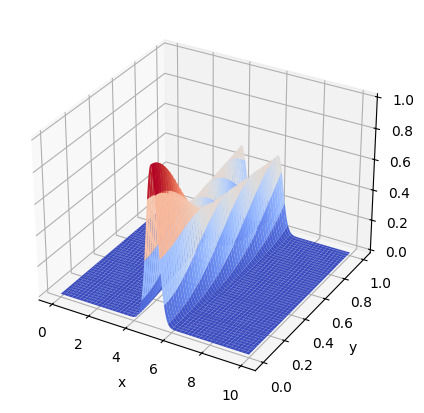

In [143]:
Nx = int(len(y[0]) / 2)

W = scipy.linalg.dft(Nx)
W_inv = W.conj().T / Nx
W_large = np.kron(np.eye(2), W)
W_large_inv = np.kron(np.eye(2), W_inv)
y_sol = y@W_large_inv.conj().T


print(np.isclose(y_sol[:, 0:500],ifft(y[:, 0: 500], axis=1), rtol=1e-1 ))
plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, y_sol[:, 0: Nx], cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zzh\Desktop\Oxford\dissertation\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


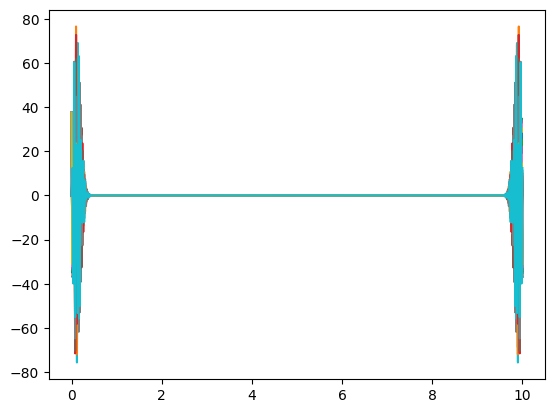

In [128]:
for i, yi in enumerate(y):
    if i %20 == 0:
        plt.plot(x, yi)

In [ ]:
D = 

In [137]:
X[0]#.astype(np.complex64)

array([[[ 37.52422527-0.j        ,   0.        -0.j        ],
        [-36.86537245-0.23163501j,   0.        +0.j        ],
        [ 34.95741413+0.43931095j,   0.        +0.j        ],
        ...,
        [-31.99438401+0.60315137j,   0.        -0.j        ],
        [ 34.95741413-0.43931095j,   0.        -0.j        ],
        [-36.86537245+0.23163501j,   0.        -0.j        ]],

       [[ 37.52422527-0.j        ,   0.        -0.j        ],
        [-36.86537245-0.23163501j,   0.        +0.j        ],
        [ 34.95741413+0.43931095j,   0.        +0.j        ],
        ...,
        [-31.99438401+0.60315137j,   0.        -0.j        ],
        [ 34.95741413-0.43931095j,   0.        -0.j        ],
        [-36.86537245+0.23163501j,   0.        -0.j        ]],

       [[ 37.52422527-0.j        ,   0.        -0.j        ],
        [-36.86537245-0.23163501j,   0.        +0.j        ],
        [ 34.95741413+0.43931095j,   0.        +0.j        ],
        ...,
        [-31.99438401+0.603

# Wave Spectral Methods



In [ ]:
def solve_wave_whole_fourier(u0, v0,c, L = 10.0, T = 1.0, Nx = 100, Nt = 500):
   
   # Number of spatial points
    dx = L / Nx   # Spatial step
    x = np.linspace(0, L, Nx)  # Spatial grid

    # Number of time steps
    dt = T / Nt  # Time step
    t = np.linspace(0, T, Nt)
    
    # Wave number
    k = 2 * np.pi * fftfreq(Nx, d=dx) 



    # Initialize solution vectors
    u_hat = fft(u0)# Initial condition (Gaussian pulse)
    v_hat = fft(v0) # Initial velocity is zero


    
    # Store results for visualization
    us_hat = np.zeros((Nt, Nx))
    vs_hat = np.zeros((Nt, Nx))

 
    for i in range(Nt):
        # Compute second spatial derivative using central difference
        us_hat[i] = np.copy(u_hat)
        vs_hat[i] = np.copy(v_hat)
        v_hat = v_hat - dt * (c**2) * (k**2) * u_hat
        u_hat = u_hat + dt * v_hat

    
    result = np.stack((us_hat, vs_hat), axis=2)
    return result

In [258]:
def gen_wave_fourier_init_fixed_speed_spec(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= 500, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.linspace(0, x_max, Nx)       # spatial grid points

    
    Nt = num
    t = np.linspace(0, tf, Nt)
    
    # Wave numbers
    k = 2 * np.pi * fftfreq(Nx, d=dx)  
    
    # Generate sets of random sigmas, x0s, ts
    u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) 

    v0 = np.zeros_like(u0)  # Initial velocity is zero
    initial = np.hstack((fft(u0), fft(v0)))
    initial_data = np.tile(initial, (num,1)).astype(np.complex64)
    y_data = np.zeros((num, Nx*2), dtype=np.complex64)
    
    # Generating Datasets
    #initial_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    #y_data = np.zeros((num, Nx, 2),dtype=np.complex64)
    
    # Initial Wavefunction
    sol = solve_wave_whole_fourier(u0 = u0, v0 = v0 ,c = c, L = x_max, T = tf, Nx = Nx, Nt = Nt)
    for i in range (num):
        y_data[i][0: Nx] = sol[i, :, 0]
        y_data[i][Nx :] = sol[i, :, 1]
    
    
    return (initial_data, t), y_data

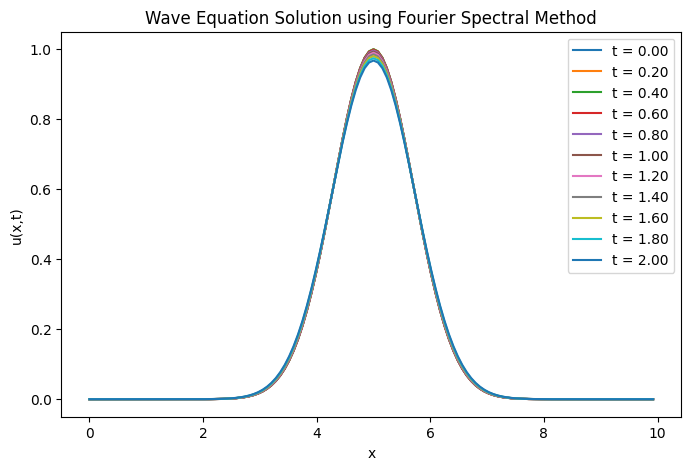

In [253]:

import numpy as np
import matplotlib.pyplot as plt

# Domain parameters
L = 10.0  # Domain length
Nx = 128  # Number of spatial points
dx = L / Nx
x = np.linspace(0, L, Nx, endpoint=False)  # Spatial grid

# Time parameters
T = 2.0   # Total time
Nt = 200  # Number of time steps
dt = T / Nt
c = 1.0   # Wave speed

# Wavenumbers for Fourier space (FFT assumes periodicity)
k = (2 * np.pi / L) * np.fft.fftfreq(Nx, d=dx)

# Initial condition: Gaussian wave packet
u0 = np.exp(-((x - L/2) ** 2))
v0 = np.zeros_like(u0)  # Initial velocity = 0

# Fourier transform of initial condition
u_hat = np.fft.fft(u0)
v_hat = np.fft.fft(v0)

# Precompute Fourier coefficients for time stepping
omega_k = c * k

# Time evolution
solutions = [u0]
for n in range(Nt):
    # Update u_hat and v_hat in Fourier space
    v_hat = v_hat - (dt * omega_k**2 * u_hat)  # dv/dt = -c^2 k^2 u_hat
    u_hat = u_hat + dt * v_hat  # du/dt = v_hat

    # Transform back to physical space
    u = np.fft.ifft(u_hat).real

    # Store solutions at intervals
    if n % 20 == 0:
        solutions.append(np.copy(u))

# Plot the wave evolution
plt.figure(figsize=(8, 5))
for i, sol in enumerate(solutions):
    plt.plot(x, sol, label=f"t = {i*dt*20:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.title("Wave Equation Solution using Fourier Spectral Method")
plt.show()



C:\Users\zzh\AppData\Local\Temp\ipykernel_25044\239127683.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  us_hat[i] = np.copy(u_hat)
C:\Users\zzh\AppData\Local\Temp\ipykernel_25044\239127683.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  vs_hat[i] = np.copy(v_hat)


(200, 500)


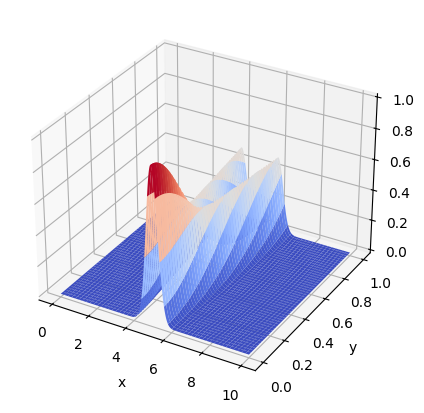

In [284]:
Nx = 500
X, y = gen_wave_fourier_init_fixed_speed_spec(num = 200, sigma = 0.3, x0 = 5.0, c = 1, Nx= Nx, x_max = 10, tf=1)
print(y[:, 0:Nx].shape)
x = np.linspace(0, 10, Nx)  
x0 = 5
t = np.linspace(0, 1, 200)
x_grid, t_grid = np.meshgrid(x, t)

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x_grid, t_grid, ifft(y[:, :Nx], axis=1), cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [286]:
y[0, 60]

np.complex64(2.1863434e-16+0j)

C:\Users\zzh\AppData\Local\Temp\ipykernel_25044\3421280777.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  energy[i] = (ux_sum + ut_sum)* dx


(-5.0, 5.0)

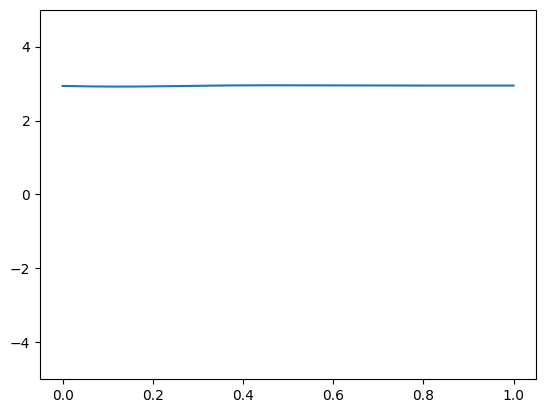

In [260]:

nx = 500
dx = 10 / nx
k = (2 * np.pi / 10) * fftfreq(nx, 1/ nx)
#k = np.fft.fftfreq(n) * nx
c = 1.0


D = np.diag(1j * k)
D_large = np.kron(np.eye(2), D)

W = scipy.linalg.dft(nx)
W_inv = W.conj().T / nx

W_large = np.kron(np.eye(2), W)
W_large_inv = np.kron(np.eye(2), W_inv)

y_sol = y@W_large_inv.conj().T
yx_true = np.array([np.gradient(yi[0:500], x) for yi in y_sol])
yx_true.shape
energy = np.zeros(len(yx_true))
c = 1.0
for i in range(len(yx_true)):
    ux_sum = c**2 * np.sum(yx_true[i][0: nx]**2)
    ut_sum = np.sum(y_sol[i][nx :] **2)
    energy[i] = (ux_sum + ut_sum)* dx
plt.plot(t, energy)
plt.ylim(-5, 5)


In [264]:
def solve_wave_single_fourier(u0, v0, c, t_ind, Nt, Nx = 100, L = 10.0, T = 1.0):
   
   # Number of spatial points
    dx = L / (Nx - 1)  # Spatial step
    x = np.linspace(0, L, Nx)  # Spatial grid

    # Number of time steps
    dt = T / Nt  # Time step
    t = np.linspace(0, T, Nt)  

    # Stability condition: CFL number


    # Initialize solution vectors
    #u = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
    #v = np.zeros_like(u)  # Initial velocity is zero
    k = 2 * np.pi * fftfreq(Nx, d=dx) 

    # Initialize solution vectors
    u_hat = fft(u0)# Initial condition (Gaussian pulse)
    v_hat = fft(v0) # Initial velocity is zero

    # Time evolution using finite differences
    u_hat_new = np.copy(u)
    v_hat_new = np.copy(v)
    
    # Store results for visualization
    us_hat = np.zeros((Nt, Nx), dtype=np.complex128)
    vs_hat = np.zeros((Nt, Nx), dtype=np.complex128)

    for i in range(Nt):
        # Compute second spatial derivative using central difference
        us_hat[i] = u_hat
        vs_hat[i] = v_hat
        v_hat = v_hat - dt * (c**2) * (k**2) * u_hat
        u_hat = u_hat + dt * v_hat

    
    result = np.stack((us_hat[t_ind], vs_hat[t_ind]), axis=1)

    
    return result

In [265]:
def gen_wave_fourier_rand_fixed_speed_spec(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1):
    """ Generate random initial conditions and their corresponding behaviour at different times

    Args:
        num (int, optional): Number of timesteps. Defaults to 200.
        sensors (int, optional): Number of satial locations. Defaults to 500.
        t0 (int, optional): lower bound of time domain. Defaults to 0.
        tf (int, optional): upper bound of time domain. Defaults to 1.

    Returns:
        (X_func, X_loc), y: 
            - X_func of shape (num, sensors): different initial conditions [[u_1(x, 0)], [u_2(x, 0)], ... [u_num(x, 0)]]
            - X_loc of shape (num, ): time steps  t_1, ..., t_num to be evaluated on
            - y (num, sensors): the entire dynamic u(x, t) with [[u_1(x, t_1)], ..., [u_num(x, t_num)]]
    """
    # Specify constants
    dx = x_max / Nx
    x     = np.arange(0, x_max, dx)       # spatial grid points
    hbar = 1

    # Range of randomized sigmas and x0s
    sigma_min = 0.2
    sigma_max = 1.2
    
    x0_min = 2.0
    x0_max = 8.0
    
    # Wave speed
    c = 1.0
    
    t = np.linspace(0, tf, Nt)
    
    # Generate sets of random sigmas, x0s, ts
    sigmas = np.random.uniform(sigma_min, sigma_max, size=num)
    x0s = np.random.uniform(x0_min, x0_max, size= num)
    t_inds = np.random.choice(np.arange(Nt), size = num)

    t_points = t[t_inds]
    
    # Generating Datasets
    initial_data = np.zeros((num, Nx*2),dtype=np.complex128)
    y_data = np.zeros((num, Nx*2),dtype=np.complex128)
    
    for i in range(num):
        sigma = sigmas[i]
        x0 = x0s[i]
        t_ind = t_inds[i]
        u0 = np.exp(-((x - x0) ** 2 / (2.0 * sigma**2))) # Initial condition (Gaussian pulse)
        v0 = np.zeros_like(u0)  # Initial velocity is zero
        initial_data[i][0: Nx] = fft(u0)
        initial_data[i][Nx: ] = fft(v0)
        # Initial Wavefunction
        sol = solve_wave_single_fourier(u0=u0, v0=v0, t_ind = t_ind, Nt=Nt, c= c, Nx = Nx, L=x_max, T = tf)

        y_data[i][0 : Nx] = sol[:, 0]
        y_data[i][Nx : ] = sol[:, 1]
    
    
    return (initial_data, t_points), y_data

In [266]:
X, y = gen_wave_fourier_rand_fixed_speed_spec(num = 200, Nx= 500, Nt = 800, x_max = 10, tf=1)


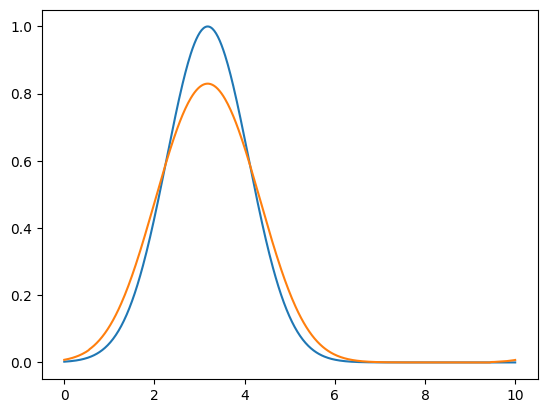

In [280]:
i = 150
plt.plot(x, ifft(X[0][i][0:500]))
plt.plot(x, ifft(y[i][0:500]))